In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('C:/Users/Amaan Siddiqui/OneDrive/New folder/Desktop/Python Projects/Paris 2024 Olympics Schedule.csv')
data

,Ranking,State,Golden,Silver,Bronze,Total
0,1,USA,40,44,42,126
1,2,People's Republic of China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France,16,26,22,64
...,...,...,...,...,...,...
86,87,Peru,0,0,1,1
87,88,Qatar,0,0,1,1
88,89,Singapore,0,0,1,1
89,90,Slovakia,0,0,1,1


In [3]:
# Preview the dataset
print(data.head())
print(data.info())

   Ranking                       State  Golden  Silver  Bronze  Total
0        1                         USA      40      44      42    126
1        2  People's Republic of China      40      27      24     91
2        3                       Japan      20      12      13     45
3        4                   Australia      18      19      16     53
4        5                      France      16      26      22     64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ranking  91 non-null     int64 
 1   State    91 non-null     object
 2   Golden   91 non-null     int64 
 3   Silver   91 non-null     int64 
 4   Bronze   91 non-null     int64 
 5   Total    91 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.4+ KB
None


In [17]:
# Summary statistics for numerical columns
summary_stats = data[['Golden', 'Silver', 'Bronze', 'Total']].describe()
print("Summary Statistics:")
summary_stats

Summary Statistics:


,Golden,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000
mean,3.604396,3.593407,4.219780,11.428571
std,6.990278,6.770816,6.558798,19.697796
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000
50%,1.000000,1.000000,2.000000,5.000000
75%,3.000000,3.000000,5.000000,9.000000
max,40.000000,44.000000,42.000000,126.000000


In [9]:
 #Total medals by type
total_golden = data['Golden'].sum()
total_silver = data['Silver'].sum()
total_bronze = data['Bronze'].sum()
print(f"\nTotal Gold Medals: {total_golden}")
print(f"Total Silver Medals: {total_silver}")
print(f"Total Bronze Medals: {total_bronze}")


Total Gold Medals: 328
Total Silver Medals: 327
Total Bronze Medals: 384


In [23]:
# Top 5 countries by total medals
top_countries = data.nlargest(5, 'Total')[['State', 'Total']]
print("\nTop 5 Countries by Total Medals:")
print(top_countries)


Top 5 Countries by Total Medals:
                        State  Total
0                         USA    126
1  People's Republic of China     91
6               Great Britain     65
4                      France     64
3                   Australia     53


In [29]:
# Country with the highest number of gold medals
top_gold_country = data.loc[data['Golden'].idxmax()]
print("\nCountry with the Most Gold Medals:")
print(top_gold_country[['State', 'Golden']])



Country with the Most Gold Medals:
State     USA
Golden     40
Name: 0, dtype: object


In [35]:
# Correlation between different medal types
correlation_matrix = data[['Golden', 'Silver', 'Bronze', 'Total']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
          Golden    Silver    Bronze     Total
Golden  1.000000  0.910950  0.880670  0.960948
Silver  0.910950  1.000000  0.940045  0.979717
Bronze  0.880670  0.940045  1.000000  0.968435
Total   0.960948  0.979717  0.968435  1.000000


C:\Users\Amaan Siddiqui\AppData\Local\Temp\ipykernel_20052\3749112244.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='State', data=top_10_countries, palette='viridis')


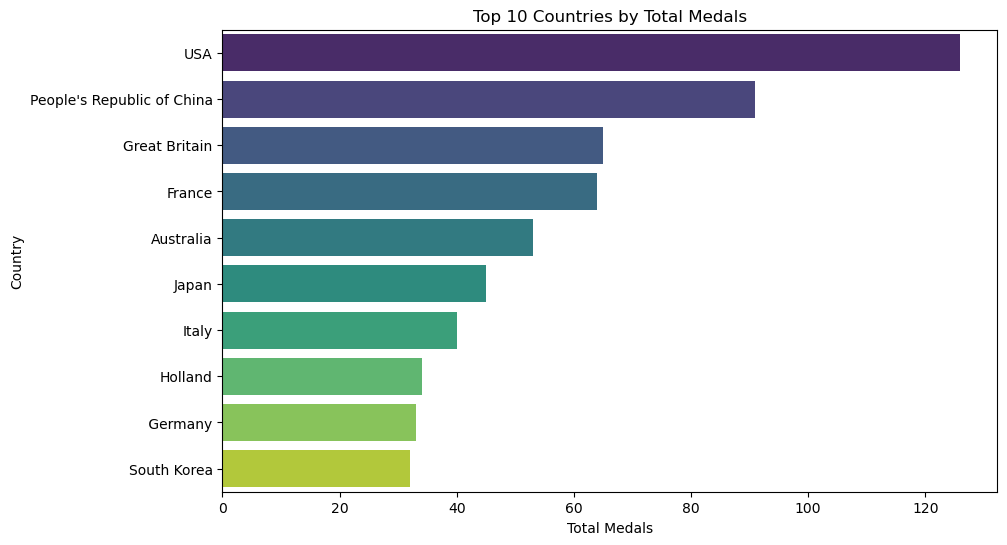

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: Top 10 countries by total medals
top_10_countries = data.nlargest(10, 'Total')
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='State', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Total Medals')
plt.ylabel('Country')
plt.show()




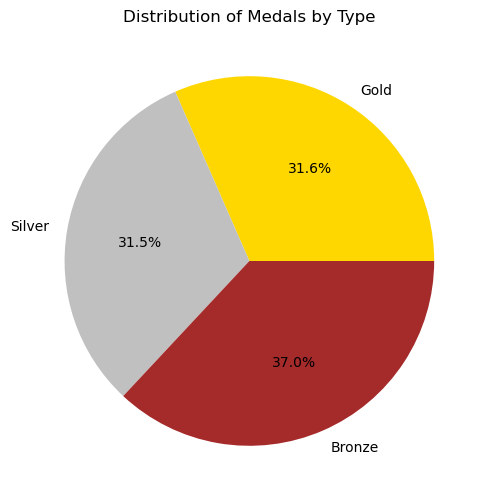

In [47]:
# Pie chart: Medal type distribution
medals = [total_golden, total_silver, total_bronze]
labels = ['Gold', 'Silver', 'Bronze']
plt.figure(figsize=(6, 6))
plt.pie(medals, labels=labels, autopct='%1.1f%%', colors=['gold', 'silver', 'brown'])
plt.title('Distribution of Medals by Type')
plt.show()

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the medal data
scaler = StandardScaler()
medal_data = data[['Golden', 'Silver', 'Bronze']]
scaled_data = scaler.fit_transform(medal_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Inspect the clusters
print("\nClustering Results:")
print(data[['State', 'Cluster']].head())



Clustering Results:
                        State  Cluster
0                         USA        2
1  People's Republic of China        1
2                       Japan        1
3                   Australia        1
4                      France        1


C:\Users\Amaan Siddiqui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


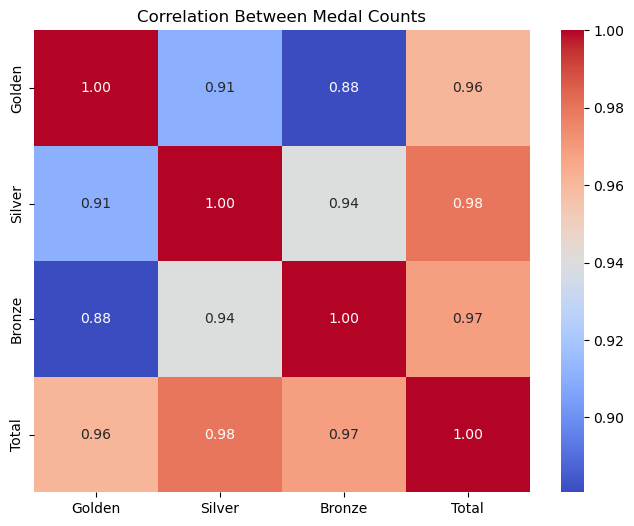

In [55]:
# Correlation matrix
correlation = data[['Golden', 'Silver', 'Bronze', 'Total']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Medal Counts')
plt.show()


In [59]:
# Find France's performance
france_data = data[data['State'] == 'France']
print("\nFrance's Performance:")
print(france_data[['Golden', 'Silver', 'Bronze', 'Total']])



France's Performance:
   Golden  Silver  Bronze  Total
4      16      26      22     64


In [63]:
# Find India's performance
france_data = data[data['State'] == 'India']
print("\nIndia's Performance:")
print(france_data[['Golden', 'Silver', 'Bronze', 'Total']])


India's Performance:
    Golden  Silver  Bronze  Total
70       0       1       5      6


C:\Users\Amaan Siddiqui\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


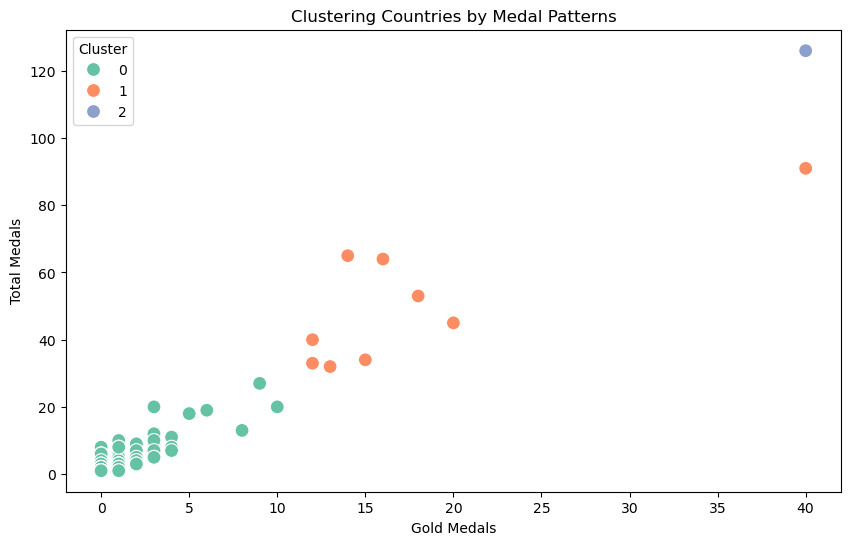

In [95]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
features = data[['Golden', 'Silver', 'Bronze']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Golden'], y=data['Total'], hue=data['Cluster'], palette='Set2', s=100)
plt.title('Clustering Countries by Medal Patterns')
plt.xlabel('Gold Medals')
plt.ylabel('Total Medals')
plt.legend(title='Cluster')
plt.show()


In [75]:
# Filter for specific country (e.g., India)
country = data[data['State'] == 'India']
print(f"Medal details for India:\n{country}")


Medal details for India:
    Ranking  State  Golden  Silver  Bronze  Total  Cluster
70       71  India       0       1       5      6        0



Countries Dominating in Gold Medals:
                         State  Golden
1   People's Republic of China      40
2                        Japan      20
5                      Holland      15
7                  South Korea      13
10                 New Zealand      10
12                  Uzbekistan       8
17                      Norway       4
18                     Ireland       4
26                      Serbia       3
27              Czech Republic       3
32                     Bahrain       2
33                    Slovenia       2
38                     Algeria       2
39                   Indonesia       2
61                    Dominica       1
62                    Pakistan       1


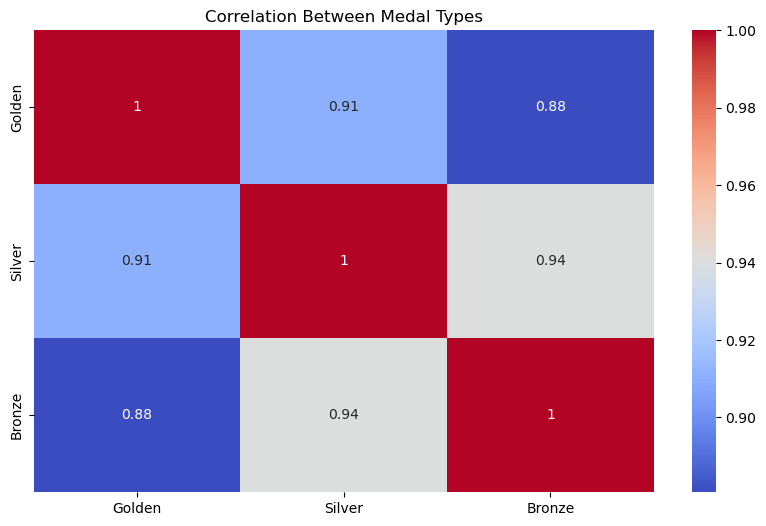

In [87]:
# Countries with more gold than other medal types
dominant_gold = data[data['Golden'] > data[['Silver', 'Bronze']].max(axis=1)]
print("\nCountries Dominating in Gold Medals:")
print(dominant_gold[['State', 'Golden']])

# Create a heatmap for medal distribution
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Golden', 'Silver', 'Bronze']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Medal Types")
plt.show()


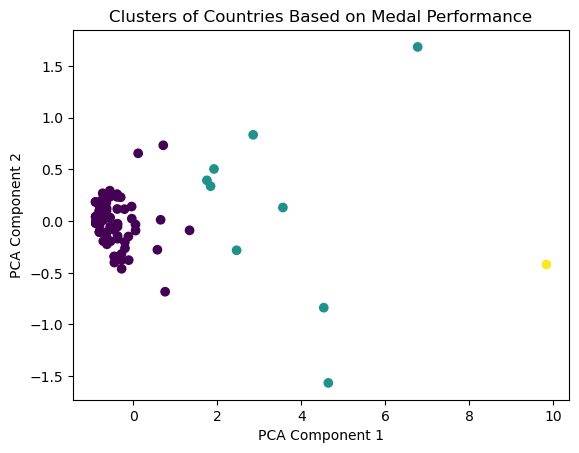

In [89]:
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Visualize clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clusters of Countries Based on Medal Performance')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [93]:
# Medal share analysis
data['Medal Share (%)'] = (data['Total'] / data['Total'].sum()) * 100
print("\nMedal Share Percentage by Country:")
print(data[['State', 'Medal Share (%)']].head())



Medal Share Percentage by Country:
                        State  Medal Share (%)
0                         USA        12.115385
1  People's Republic of China         8.750000
2                       Japan         4.326923
3                   Australia         5.096154
4                      France         6.153846
